In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
business_data = []
for line in open('business.json', 'r', encoding='utf-8'):
    business_data.append(json.loads(line))


In [4]:
business_data[0]

{'business_id': '6iYb2HFDywm3zjuRg0shjw',
 'name': 'Oskar Blues Taproom',
 'address': '921 Pearl St',
 'city': 'Boulder',
 'state': 'CO',
 'postal_code': '80302',
 'latitude': 40.0175444,
 'longitude': -105.2833481,
 'stars': 4.0,
 'review_count': 86,
 'is_open': 1,
 'attributes': {'RestaurantsTableService': 'True',
  'WiFi': "u'free'",
  'BikeParking': 'True',
  'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
  'BusinessAcceptsCreditCards': 'True',
  'RestaurantsReservations': 'False',
  'WheelchairAccessible': 'True',
  'Caters': 'True',
  'OutdoorSeating': 'True',
  'RestaurantsGoodForGroups': 'True',
  'HappyHour': 'True',
  'BusinessAcceptsBitcoin': 'False',
  'RestaurantsPriceRange2': '2',
  'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
  'HasTV': 'True',
  'Alcohol': "'beer_and_wine'",
  'GoodFo

In [7]:
business_df = pd.DataFrame(business_data)

D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


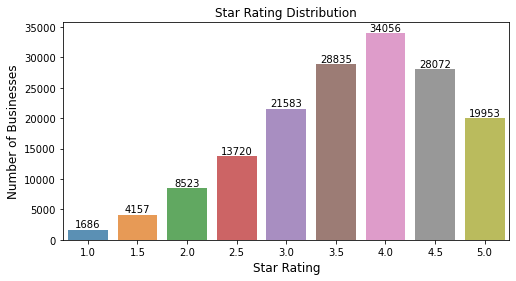

In [25]:
stars = business_df['stars'].value_counts().sort_index()
plt.figure(figsize=(8,4))
ax = sns.barplot(stars.index, stars.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.xlabel("Star Rating", fontsize=12)
plt.ylabel("Number of Businesses", fontsize=12)
rects = ax.patches
labels = stars.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


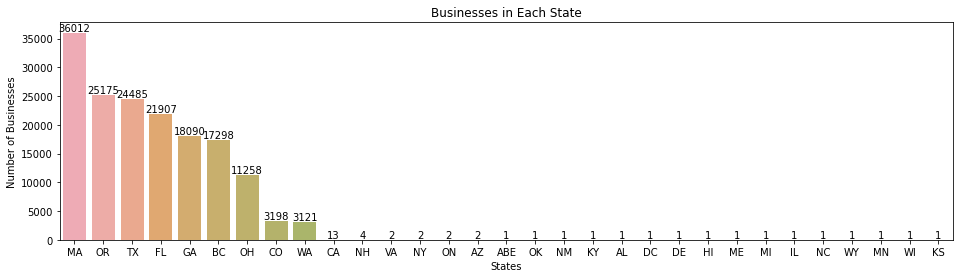

In [85]:
states = business_df['state'].value_counts()
plt.figure(figsize=(16,4))
ax = sns.barplot(states.index, states.values, alpha=0.8)
plt.title("Businesses in Each State")
plt.xlabel("States")
plt.ylabel("Number of Businesses")
rects = ax.patches
labels = states.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')
plt.show()

In [84]:
cities = business_df['city'].value_counts()
print(len(cities))
cities_business_counts = cities.values
cities_business_counts

836


array([22416, 18203, 13330, 12612, 10637,  8263,  6634,  2542,  2433,
        2252,  1791,  1725,  1713,  1411,  1288,  1265,  1093,   986,
         926,   916,   883,   823,   820,   783,   761,   734,   721,
         672,   669,   668,   652,   618,   607,   602,   595,   584,
         577,   569,   545,   540,   538,   522,   517,   512,   492,
         484,   476,   476,   472,   472,   469,   461,   456,   453,
         450,   436,   434,   430,   416,   412,   405,   403,   403,
         397,   393,   392,   359,   359,   338,   324,   323,   322,
         319,   319,   319,   318,   313,   307,   304,   304,   303,
         302,   291,   287,   286,   280,   273,   265,   255,   253,
         253,   249,   243,   238,   237,   237,   234,   232,   231,
         228,   227,   227,   226,   225,   223,   222,   218,   217,
         205,   203,   197,   195,   195,   187,   186,   183,   179,
         174,   169,   169,   168,   167,   167,   161,   157,   156,
         153,   152,

D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


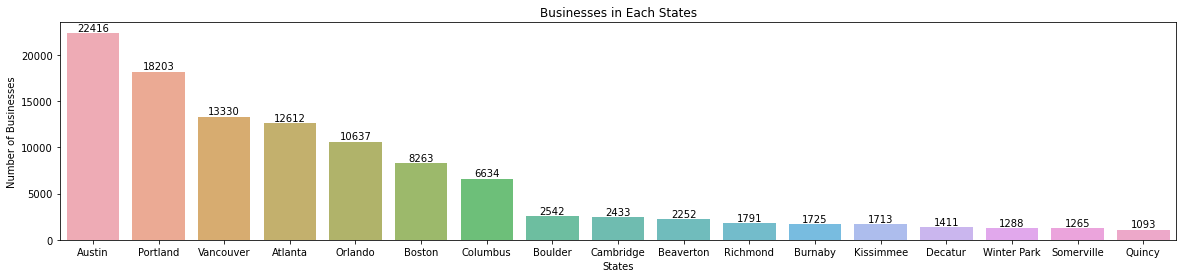

In [89]:
cities = business_df['city'].value_counts()
cities_plt = cities.iloc[cities.values >= 1000]
plt.figure(figsize=(20,4))
ax = sns.barplot(cities_plt.index, cities_plt.values, alpha=0.8)
plt.title("Businesses in Each States")
plt.xlabel("States")
plt.ylabel("Number of Businesses")
rects = ax.patches
labels = cities_plt.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')
plt.show()

There are  59068  different types/categories of Businesses in Yelp!


D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


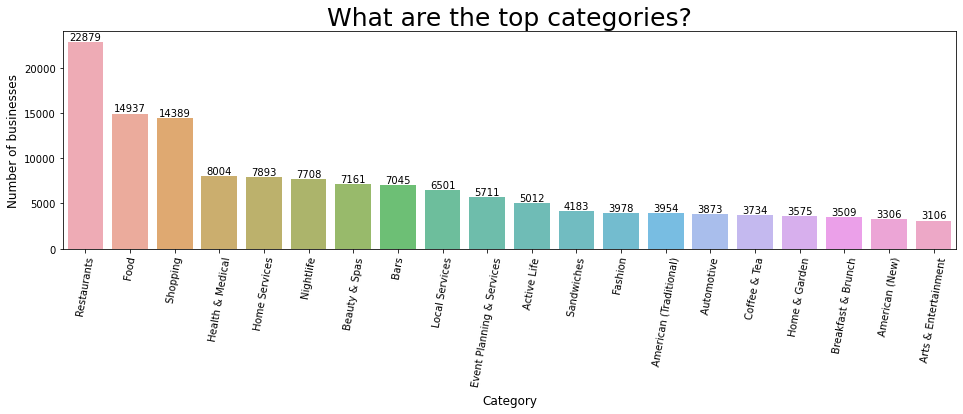

In [129]:
cat_business = ' '.join(business_df['categories'].dropna())
cats = pd.DataFrame(cat_business.split(','),columns=['category'])
x = cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [2]:
review_data = []
for line in open('review.json', 'r', encoding='utf-8'):
    review_data.append(json.loads(line))

In [132]:
review_data[0]

{'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a 

In [3]:
review_df = pd.DataFrame(review_data)

In [4]:
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
8635398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1.0,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
8635399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1.0,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
8635400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5.0,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
8635401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2.0,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [63]:
user_agg = review_df.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [64]:
user_agg = user_agg.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users in Yelp")
user_agg.head(10)

Top 10 Users in Yelp


review_id                 date                       \
                           count                  min                  max   
user_id                                                                      
RtGqdDBvvBCjcu5dUqwfzA      6073  2010-11-02 18:35:26  2020-09-18 05:36:55   
Xwnf20FKuikiHcSpcEbpKQ      3861  2011-06-15 15:43:14  2020-05-09 10:10:10   
tgrs5VQ6thhouiEtMU-N_w      2265  2011-02-09 08:26:50  2021-01-10 09:08:34   
j14WgRoU_-2ZE1aw1dXrJg      1958  2009-03-28 03:44:22  2021-01-26 14:31:21   
jpIGlAym6z88W2xzHiK5_A      1671  2015-02-26 18:05:43  2021-01-24 04:28:50   
9EeEpkZg5jV18N_KvrcT6g      1516  2009-06-11 23:02:40  2020-11-12 04:05:14   
nl8gWLDo6U6MjqzbBmE_9A      1509  2008-09-09 00:50:16  2021-01-04 04:25:43   
R1FVpAyl_BtxHBWdau2VLg      1497  2010-11-04 18:44:29  2021-01-22 16:55:45   
Pf7FI0OukC_CEcCz0ZxoUw      1449  2007-07-11 04:10:59  2021-01-22 22:50:26   
gqL5KBs2oS7qobnyd99iKg      1286  2011-12-20 00:01:21  2021-01-27 15:08:28   

                       useful  funny   cool     stars  
                          sum    sum    sum      mean  
user_id                                                
RtGqdDBvvBCjcu5dUqwfzA   7595   2437   2100  3.806521  
Xwnf20FKuikiHcSpcEbpKQ   4948   2068   2722  3.363118  
tgrs5VQ6thhouiEtMU-N_w   3098   1203   1354  3.420309  
j14WgRoU_-2ZE1aw1dXrJg  19241   5266  10821  3.611338  
jpIGlAym6z88W2xzHiK5_A   1905    579    984  3.514662  
9EeEpkZg5jV18N_KvrcT6g   2507   1087   1486  3.710422  
nl8gWLDo6U6MjqzbBmE_9A   2528    665    920  3.472498  
R1FVpAyl_BtxHBWdau2VLg   4786   1438   3105  3.645959  
Pf7FI0OukC_CEcCz0ZxoUw  16644   9911  11428  3.982057  
gqL5KBs2oS7qobnyd99iKg  39394  19984  34834  3.896579

In [48]:
review_count = user_agg['review_id']['count'].sort_values(ascending=True)
print(len(review_count))
print(review_count.value_counts()[0:10])
print(sum(review_count.value_counts()[0:6]))
print(review_count.value_counts()[review_count.value_counts().index == 100])

2189457
1     1173684
2      363249
3      179185
4      107674
5       70854
6       50116
7       37178
8       29034
9       22949
10      18266
Name: count, dtype: int64
1944762
100    96
Name: count, dtype: int64


D:\software\code-project\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\software\code-project\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


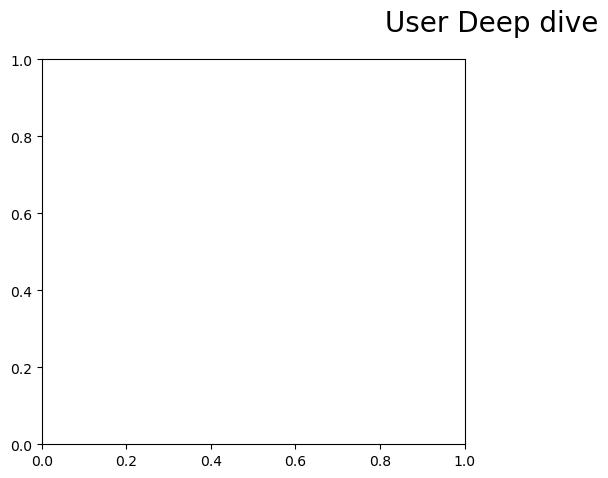

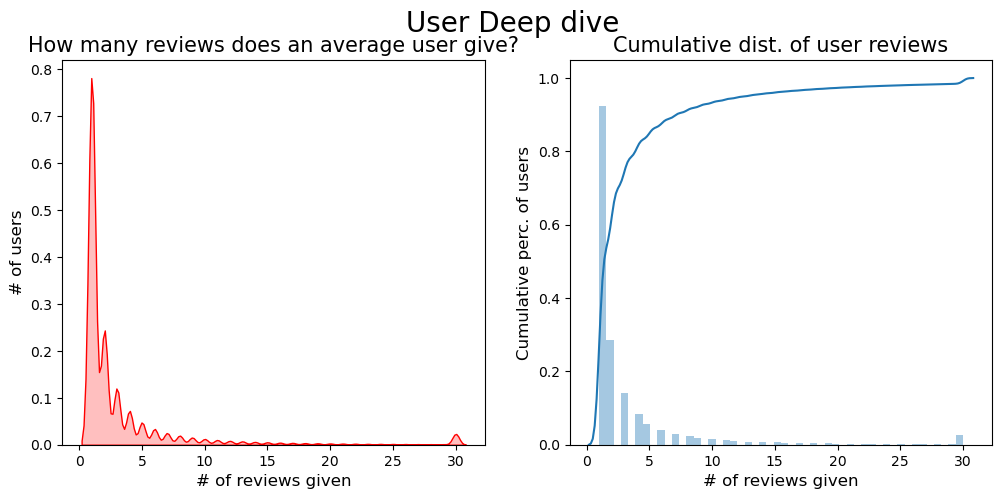

In [53]:
import matplotlib.gridspec as gridspec 
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))

ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()

In [65]:
useful_count = user_agg[('useful', 'sum')].sort_values(ascending=False)
useful_count_aver = user_agg[('useful', 'sum')] / user_agg[('review_id', 'count')]

In [66]:
useful_count.head()

user_id
YTu0c-1I9ECeksIgoHXFPA    46163
gqL5KBs2oS7qobnyd99iKg    39394
AbMjnKOwg736fcIu8apuyQ    25790
JjXuiru1_ONzDkYVrHN0aw    21342
j14WgRoU_-2ZE1aw1dXrJg    19241
Name: (useful, sum), dtype: int64

In [69]:
useful_count_aver.sort_values(ascending=False).head()

user_id
5-WdUN5ECABrjXtPPYiLmA    398.0
aIbYxOV_3dBIPUcnl806xg    323.0
Xh_dbm0alP-z7f1Uj50_ZA    252.0
QerzA8F6tC48kHlsK6i8kA    233.0
K74S1UK7QjAhWnkXIN0nhg    224.4
dtype: float64

In [71]:
funny_count = user_agg[('funny', 'sum')].sort_values(ascending=False)
funny_count_aver = user_agg[('funny', 'sum')] / user_agg[('review_id', 'count')]

In [74]:
funny_count.head()

user_id
YTu0c-1I9ECeksIgoHXFPA    22027
gqL5KBs2oS7qobnyd99iKg    19984
AbMjnKOwg736fcIu8apuyQ    18964
JjXuiru1_ONzDkYVrHN0aw    16253
PI51J_fKhEfZKhi-MjWBpg    15146
Name: (funny, sum), dtype: int64

In [75]:
funny_count_aver.sort_values(ascending=False).head()

user_id
5-WdUN5ECABrjXtPPYiLmA    529.000000
Cf9DiXFtnP7N_5IjyyKMZQ    225.857143
M3J-qzoxg82TLL6zOxsyYw    214.000000
qrBCqFLFNXF93wtU45EGaQ    182.000000
DkxdlzqEUB7FaODAmH1rkA    180.000000
dtype: float64

In [76]:
cool_count = user_agg[('cool', 'sum')].sort_values(ascending=False)
cool_count_aver = user_agg[('cool', 'sum')] / user_agg[('review_id', 'count')]

In [77]:
cool_count.head()

user_id
YTu0c-1I9ECeksIgoHXFPA    47089
gqL5KBs2oS7qobnyd99iKg    34834
AbMjnKOwg736fcIu8apuyQ    23895
JjXuiru1_ONzDkYVrHN0aw    20072
PI51J_fKhEfZKhi-MjWBpg    17357
Name: (cool, sum), dtype: int64

In [78]:
cool_count_aver.sort_values(ascending=False).head()

user_id
5-WdUN5ECABrjXtPPYiLmA    530.00
aIbYxOV_3dBIPUcnl806xg    318.00
K74S1UK7QjAhWnkXIN0nhg    216.80
7W-p-PJlmrzg0mk3pWKoyQ    194.00
t6GcTUvCyfdYegVV9yU5Qw    183.25
dtype: float64